In [6]:
import sqlite3
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Grab the data from the DB. Paths with ~ will break this.
dbAbsolutePath = '/home/keeks/code/lizard/history/gdax_0.1.db'
conn = sqlite3.connect(dbAbsolutePath)
query = 'select * from candles_USD_BTC'
minutely_candles = pd.read_sql_query(query, conn)

minutely_candles.dropna()
print(minutely_candles.head())

   id       start      open      high       low     close           vwp  \
0   1  1512535020  12221.90  12221.90  12213.33  12219.82  12219.090523   
1   3  1512535080  12219.82  12219.82  12212.04  12219.63  12219.049882   
2   5  1512535140  12219.62  12219.62  12214.28  12216.67  12216.870828   
3   7  1512535200  12216.67  12216.68  12216.51  12216.52  12216.660592   
4   9  1512535260  12216.52  12216.52  12212.04  12212.05  12213.151112   

      volume  trades  
0  18.704906      92  
1  12.386150      86  
2   8.060148      61  
3  19.597871      53  
4  13.220658      53  


In [7]:
# Add some features
minutely_candles['timestamp'] = minutely_candles['start'].apply(lambda ts: datetime.datetime.fromtimestamp(ts))
#minutely_candles['timestamp_str'] = minutely_candles['timestamp'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M:%S'))
minutely_candles['totalMillions'] = (minutely_candles['vwp'] * minutely_candles['trades']) / 1000000
minutely_candles = minutely_candles.drop(columns=['id', 'start'])
print(minutely_candles.head())

       open      high       low     close           vwp     volume  trades  \
0  12221.90  12221.90  12213.33  12219.82  12219.090523  18.704906      92   
1  12219.82  12219.82  12212.04  12219.63  12219.049882  12.386150      86   
2  12219.62  12219.62  12214.28  12216.67  12216.870828   8.060148      61   
3  12216.67  12216.68  12216.51  12216.52  12216.660592  19.597871      53   
4  12216.52  12216.52  12212.04  12212.05  12213.151112  13.220658      53   

            timestamp  totalMillions  
0 2017-12-05 20:37:00       1.124156  
1 2017-12-05 20:38:00       1.050838  
2 2017-12-05 20:39:00       0.745229  
3 2017-12-05 20:40:00       0.647483  
4 2017-12-05 20:41:00       0.647297  


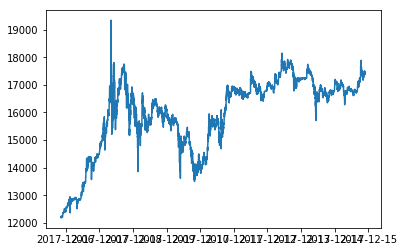

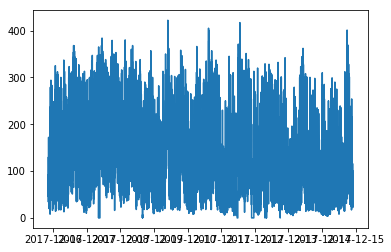

In [9]:
# Noisy as fro, yo, need to aggregate
plt.plot(minutely_candles['timestamp'], minutely_candles['vwp'])
plt.show()

plt.plot(minutely_candles['timestamp'], minutely_candles['trades'])
plt.show()


In [10]:
# Aggregate to hourly level
hourly_candles = minutely_candles.copy()
# Truncate timestamp to hour
hourly_candles['timestamp'] = hourly_candles['timestamp'].apply(lambda ts: ts.replace(microsecond=0,second=0,minute=0))
#minutely_candles['timestamp_str'] = hourly_candles['timestamp'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M:%S'))
# TODO: Open/Close aggregation
hourly_candles.groupby('timestamp').agg({'high': max,
                                         'low': min,
                                         'trades': sum})


,high,trades,low
timestamp,,,
2017-12-05 20:00:00,12242.38,2106,12181.00
2017-12-05 21:00:00,12300.00,4305,12204.01
2017-12-05 22:00:00,12450.00,7423,12299.99
2017-12-05 23:00:00,12540.00,7116,12354.99
2017-12-06 00:00:00,12589.55,5815,12410.87
2017-12-06 01:00:00,12731.19,6183,12558.48
2017-12-06 02:00:00,12920.00,5839,12699.99
2017-12-06 03:00:00,12947.00,7241,12313.37
2017-12-06 04:00:00,12864.00,4293,12762.75
